In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.layers import  Dense, Flatten, Input,Dropout
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os
from tqdm import tqdm
import cv2
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential,load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ML/FaceMask/dataset/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/110/dataset
with_mask/  without_mask/


In [ ]:
directory = r"/content/drive/MyDrive/ML/FaceMask/dataset"
categories = ["with_mask" , 'without_mask']

In [ ]:
print("loading images")
data = []
labels = []

# Loading image via split category to array
for category in categories:
    path = os.path.join(directory , category)
    print("\n\n category : " + category +"\n")
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path , img)
        try:
          image = load_img(img_path , target_size=(224 , 224))
          image = img_to_array(image)
          image = preprocess_input(image)
          
          data.append(image)
          labels.append(category)
        except:
          print("")

  0%|          | 0/1916 [00:00<?, ?it/s]

loading images


 category : with_mask



 28%|██▊       | 531/1916 [00:08<00:11, 116.84it/s]

  1%|▏         | 26/1919 [00:00<00:07, 259.75it/s]



 category : without_mask



 27%|██▋       | 515/1919 [00:01<00:04, 305.48it/s]

100%|██████████| 1919/1919 [00:05<00:00, 381.71it/s]


In [ ]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
# crate arraye
data = np.array(data , "float32")
labels = np.array(labels)

In [ ]:
# Splitting The data
(Xtrain , Xtest , ytrain , ytest) = train_test_split(data , labels , test_size = 0.20 , random_state = 42 , stratify = labels)

In [ ]:
# Construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20,
                        zoom_range=0.15,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.15,
                        horizontal_flip=True)


In [ ]:
model=Sequential([
        Input(shape=(224,224,3)),
        Dropout(0.2),
        Flatten(),
        Dense(256,activation='relu'),
        Dense(128,activation='relu'),
        Dense(2,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 224, 224, 3)       0         
_________________________________________________________________
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               38535424  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 38,568,578
Trainable params: 38,568,578
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling the model
epochs = 20
batch_size = 32
ler=1e-4

opt = Adam(lr = ler , decay = ler / epochs)
model.compile(loss = "binary_crossentropy" , optimizer = opt , metrics=["accuracy"])

In [ ]:
history = model.fit(aug.flow(Xtrain , ytrain , batch_size=batch_size),epochs = epochs)

Epoch 1/20
96/96 [==============================] - 28s 289ms/step - loss: 0.9669 - accuracy: 0.7414
Epoch 2/20
96/96 [==============================] - 28s 289ms/step - loss: 0.8385 - accuracy: 0.8336
Epoch 3/20
96/96 [==============================] - 28s 288ms/step - loss: 0.6221 - accuracy: 0.8585
Epoch 4/20
96/96 [==============================] - 28s 289ms/step - loss: 0.5518 - accuracy: 0.8727
Epoch 5/20
96/96 [==============================] - 28s 290ms/step - loss: 0.5805 - accuracy: 0.8684
Epoch 6/20
96/96 [==============================] - 28s 288ms/step - loss: 0.5021 - accuracy: 0.8709
Epoch 7/20
96/96 [==============================] - 28s 288ms/step - loss: 0.6108 - accuracy: 0.8688
Epoch 8/20
96/96 [==============================] - 28s 289ms/step - loss: 0.5135 - accuracy: 0.8627
Epoch 9/20
96/96 [==============================] - 28s 288ms/step - loss: 0.5448 - accuracy: 0.8698
Epoch 10/20
96/96 [==============================] - 28s 290ms/step - loss: 0.4678 - accura


--------chart---------


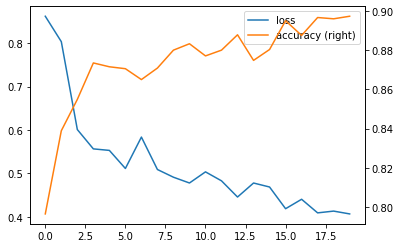

In [ ]:
print("\n--------chart---------")
result = pd.DataFrame.from_dict(history.history)
result.plot.line(secondary_y=["accuracy"])

In [ ]:
test_results = model.predict(Xtest)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

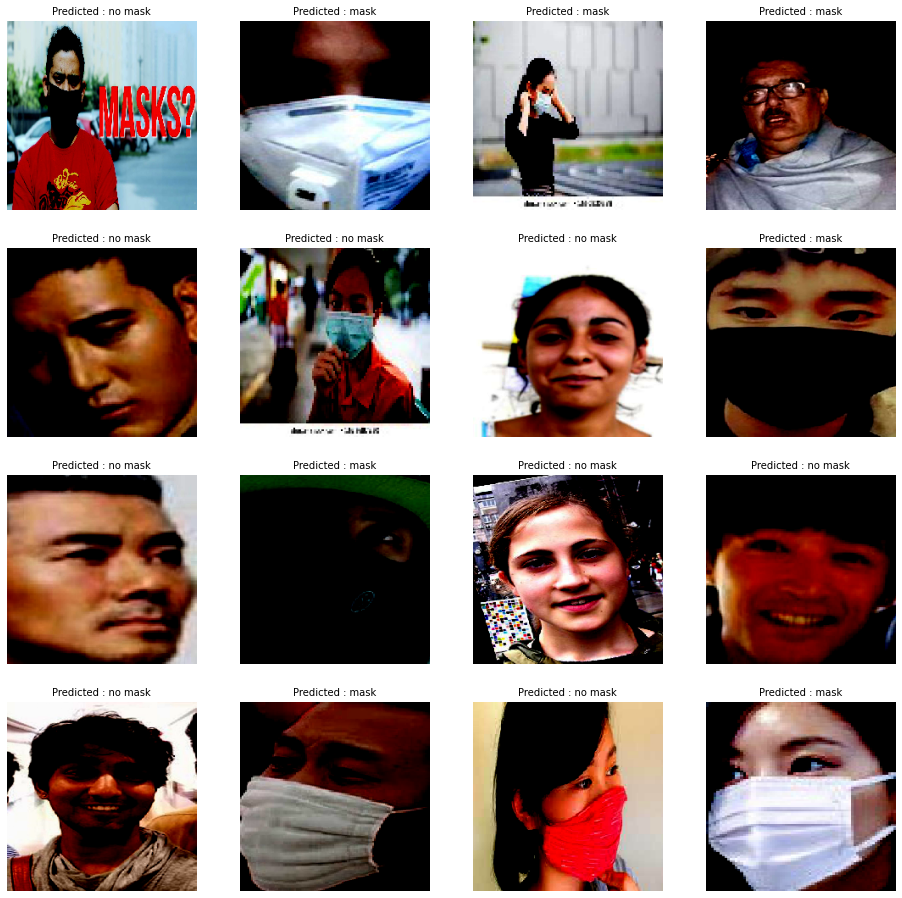

In [ ]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

for i in range(16):
  if test_results[i][0]>test_results[i][1]:
    prediction = "mask"
  else:
    prediction = "no mask"

  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  sp.set_title(f'Predicted : {prediction}', fontsize=10)
  plt.imshow(Xtest[i])
plt.show()

In [ ]:
%cd /content/drive/MyDrive/ML/
%ls

/content/drive/MyDrive/ML
FaceMask@         face_mask_CNN.ipynb  face_mask_Dense.ipynb
face_mask_CNN.h5  face_mask_Dense.h5


In [ ]:
model.save('face_mask_Dense.h5')